In [4]:
import pandas as pd
import numpy as np

# Generate sample e-commerce sales data
np.random.seed(42)
num_rows = 1000

data = {
    "Order ID": np.arange(1, num_rows+1),
    "Order Date": pd.date_range(start="2023-01-01", periods=num_rows, freq="D"),
    "Product": np.random.choice(["Laptop", "Headphones", "Mobile Phone", "Camera", "Smartwatch"], size=num_rows),
    "Category": np.random.choice(["Electronics", "Accessories"], size=num_rows),
    "Quantity": np.random.randint(1, 5, size=num_rows),
    "Price": np.random.randint(1000, 50000, size=num_rows),
    "Customer Location": np.random.choice(["Delhi", "Mumbai", "Bangalore", "Kolkata", "Chennai"], size=num_rows),
    "Payment Method": np.random.choice(["Credit Card", "Debit Card", "Net Banking", "UPI", "Cash on Delivery"], size=num_rows)
}

df = pd.DataFrame(data)
df["Total Sales"] = df["Quantity"] * df["Price"]

# Save dataset as CSV (optional)
df.to_csv("ecommerce_sales.csv", index=False)

# Display first 5 rows
df.head()


,Order ID,Order Date,Product,Category,Quantity,Price,Customer Location,Payment Method,Total Sales
0,1,2023-01-01,Camera,Accessories,3,37224,Bangalore,Credit Card,111672
1,2,2023-01-02,Smartwatch,Accessories,4,8788,Chennai,Net Banking,35152
2,3,2023-01-03,Mobile Phone,Accessories,1,29082,Mumbai,Net Banking,29082
3,4,2023-01-04,Smartwatch,Accessories,4,25034,Bangalore,Debit Card,100136
4,5,2023-01-05,Smartwatch,Accessories,3,36479,Kolkata,Debit Card,109437


In [6]:
# Cell 1 — imports & plotting config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")


In [7]:
# Cell 2 — load dataset (or regenerate if missing)
import os

if os.path.exists("ecommerce_sales.csv"):
    df = pd.read_csv("ecommerce_sales.csv")
else:
    # quick generator (small sample) — safe fallback
    np.random.seed(42)
    n = 1000
    df = pd.DataFrame({
        "order_id": np.arange(1, n+1),
        "order_date": pd.date_range("2023-01-01", periods=n, freq="D"),
        "product": np.random.choice(["Laptop","Headphones","Mobile","Camera","Smartwatch"], n),
        "category": np.random.choice(["Electronics","Accessories"], n),
        "quantity": np.random.randint(1,5,n),
        "price": np.random.randint(1000,50000,n),
        "customer_location": np.random.choice(["Delhi","Mumbai","Bangalore","Kolkata","Chennai"],n),
        "payment_method": np.random.choice(["Credit Card","UPI","COD","Netbanking"], n)
    })
    df["total_sales"] = df["quantity"] * df["price"]
    df.to_csv("ecommerce_sales.csv", index=False)

# quick preview
df.head()


,Order ID,Order Date,Product,Category,Quantity,Price,Customer Location,Payment Method,Total Sales
0,1,2023-01-01,Camera,Accessories,3,37224,Bangalore,Credit Card,111672
1,2,2023-01-02,Smartwatch,Accessories,4,8788,Chennai,Net Banking,35152
2,3,2023-01-03,Mobile Phone,Accessories,1,29082,Mumbai,Net Banking,29082
3,4,2023-01-04,Smartwatch,Accessories,4,25034,Bangalore,Debit Card,100136
4,5,2023-01-05,Smartwatch,Accessories,3,36479,Kolkata,Debit Card,109437


In [8]:
# Cell 3 — basic checks
df.shape, df.columns.tolist()
df.info()
df.describe(include='all').T
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           1000 non-null   int64 
 1   Order Date         1000 non-null   object
 2   Product            1000 non-null   object
 3   Category           1000 non-null   object
 4   Quantity           1000 non-null   int64 
 5   Price              1000 non-null   int64 
 6   Customer Location  1000 non-null   object
 7   Payment Method     1000 non-null   object
 8   Total Sales        1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


np.int64(0)

In [9]:
# Cell 4 — clean column names & ensure date type
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^0-9a-z_]', '', regex=True)
df['order_date'] = pd.to_datetime(df['order_date'])
# make sure numeric columns are numeric
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce').fillna(0).astype(int)
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0.0)
df['total_sales'] = pd.to_numeric(df.get('total_sales', df['quantity'] * df['price']), errors='coerce').fillna(0.0)

df.head()


,order_id,order_date,product,category,quantity,price,customer_location,payment_method,total_sales
0,1,2023-01-01,Camera,Accessories,3,37224,Bangalore,Credit Card,111672
1,2,2023-01-02,Smartwatch,Accessories,4,8788,Chennai,Net Banking,35152
2,3,2023-01-03,Mobile Phone,Accessories,1,29082,Mumbai,Net Banking,29082
3,4,2023-01-04,Smartwatch,Accessories,4,25034,Bangalore,Debit Card,100136
4,5,2023-01-05,Smartwatch,Accessories,3,36479,Kolkata,Debit Card,109437


In [10]:
# Cell 5 — create date parts & convenient period keys
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.strftime('%b')
df['weekday'] = df['order_date'].dt.day_name()
df['year_month'] = df['order_date'].dt.to_period('M').astype(str)
# bi-weekly using 2-week resample later; also add iso week if needed
df['iso_week'] = df['order_date'].dt.isocalendar().week
df.head()


,order_id,order_date,product,category,quantity,price,customer_location,payment_method,total_sales,year,month,month_name,weekday,year_month,iso_week
0,1,2023-01-01,Camera,Accessories,3,37224,Bangalore,Credit Card,111672,2023,1,Jan,Sunday,2023-01,52
1,2,2023-01-02,Smartwatch,Accessories,4,8788,Chennai,Net Banking,35152,2023,1,Jan,Monday,2023-01,1
2,3,2023-01-03,Mobile Phone,Accessories,1,29082,Mumbai,Net Banking,29082,2023,1,Jan,Tuesday,2023-01,1
3,4,2023-01-04,Smartwatch,Accessories,4,25034,Bangalore,Debit Card,100136,2023,1,Jan,Wednesday,2023-01,1
4,5,2023-01-05,Smartwatch,Accessories,3,36479,Kolkata,Debit Card,109437,2023,1,Jan,Thursday,2023-01,1


In [11]:
# Cell 6 — core metrics for the loaded data
delivered_df = df.copy()  # if you have order_status filter, use it e.g., df[df.order_status=='Delivered']
total_revenue = delivered_df['total_sales'].sum()
total_orders = delivered_df['order_id'].nunique()
unique_customers = delivered_df['customer_location'].nunique()  # replace with customer_id if present
avg_order_value = delivered_df['total_sales'].mean()

total_revenue, total_orders, unique_customers, round(avg_order_value,2)


(np.int64(59905656), 1000, 5, np.float64(59905.66))

In [12]:
# Cell 7 — time series aggregations
df_ts = df.set_index('order_date').sort_index()

monthly_rev = df_ts['total_sales'].resample('M').sum().reset_index().rename(columns={'order_date':'month','total_sales':'revenue'})
biweekly_rev = df_ts['total_sales'].resample('2W').sum().reset_index().rename(columns={'order_date':'biweek_start','total_sales':'revenue'})

monthly_rev.head(), biweekly_rev.head()


C:\Users\NISHANT KUMAR\AppData\Local\Temp\ipykernel_34868\536266211.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rev = df_ts['total_sales'].resample('M').sum().reset_index().rename(columns={'order_date':'month','total_sales':'revenue'})


(       month  revenue
 0 2023-01-31  2482322
 1 2023-02-28  1720086
 2 2023-03-31  2163675
 3 2023-04-30  2099085
 4 2023-05-31  2267791,
   biweek_start  revenue
 0   2023-01-01   111672
 1   2023-01-15   778990
 2   2023-01-29  1289819
 3   2023-02-12  1037122
 4   2023-02-26   851343)

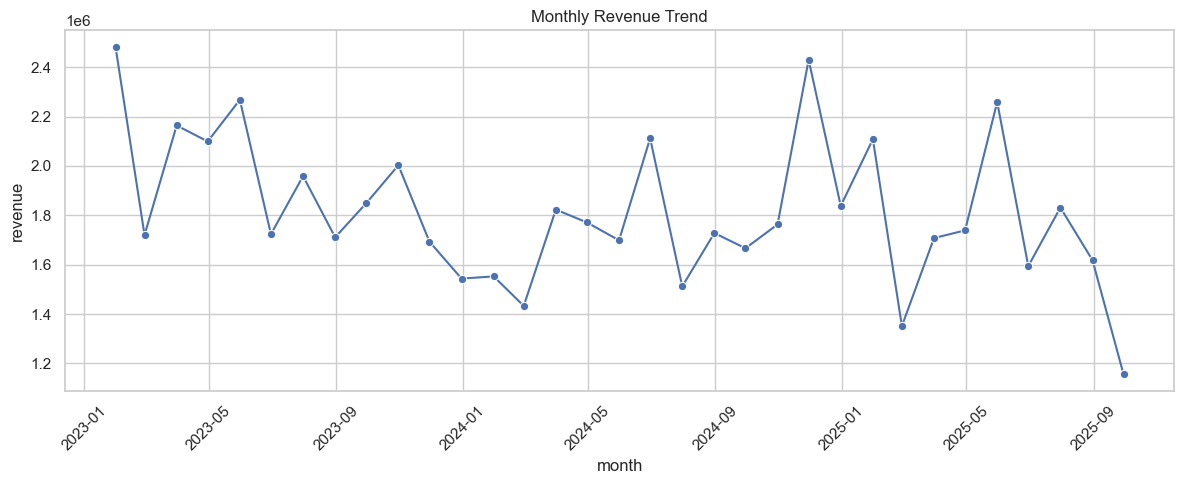

In [13]:
# Cell 8 — monthly revenue line chart
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_rev, x='month', y='revenue', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.savefig("monthly_revenue.png", bbox_inches='tight')
plt.show()


In [14]:
# Cell 9 — top products and categories
top_products = df.groupby('product').agg(revenue=('total_sales','sum'), orders=('order_id','count')).sort_values('revenue', ascending=False).reset_index()
top_categories = df.groupby('category').agg(revenue=('total_sales','sum'), orders=('order_id','count')).sort_values('revenue', ascending=False).reset_index()

top_products.head(10), top_categories


(        product   revenue  orders
 0        Laptop  13626001     210
 1    Smartwatch  12200251     204
 2        Camera  11943335     206
 3    Headphones  11303895     190
 4  Mobile Phone  10832174     190,
       category   revenue  orders
 0  Electronics  31180333     513
 1  Accessories  28725323     487)

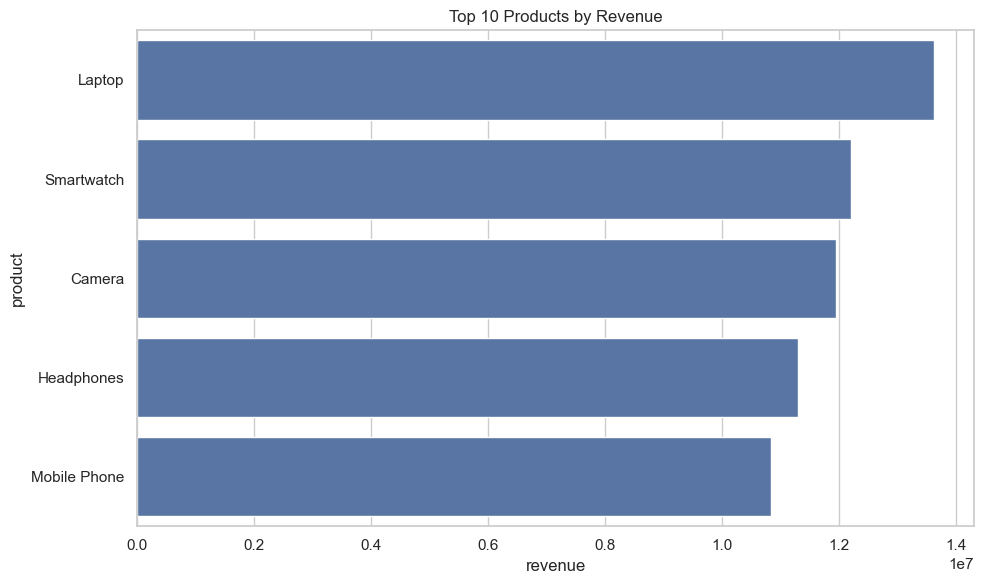

In [15]:
# Cell 10 — barplot top 10 products
plt.figure(figsize=(10,6))
sns.barplot(data=top_products.head(10), x='revenue', y='product')
plt.title("Top 10 Products by Revenue")
plt.tight_layout()
plt.savefig("top_products.png", bbox_inches='tight')
plt.show()


In [16]:
# Cell 11 — top locations
top_cities = df.groupby('customer_location').agg(revenue=('total_sales','sum'), orders=('order_id','count')).sort_values('revenue', ascending=False).reset_index()
top_cities.head()


,customer_location,revenue,orders
0,Delhi,13083798,216
1,Bangalore,12296773,206
2,Chennai,12030157,195
3,Mumbai,11346085,188
4,Kolkata,11148843,195


In [17]:
# Cell 12 — per-customer metrics (if customer_id exists, prefer that)
if 'customer_id' in df.columns:
    cust = df[df['total_sales']>0].groupby('customer_id').agg(orders=('order_id','count'), total_rev=('total_sales','sum')).reset_index()
    cust['avg_order_value'] = cust['total_rev'] / cust['orders']
    repeat_buyers = cust[cust['orders']>1].shape[0]
    cust.head()
else:
    print("No customer_id column — consider using another identifier if available.")


No customer_id column — consider using another identifier if available.


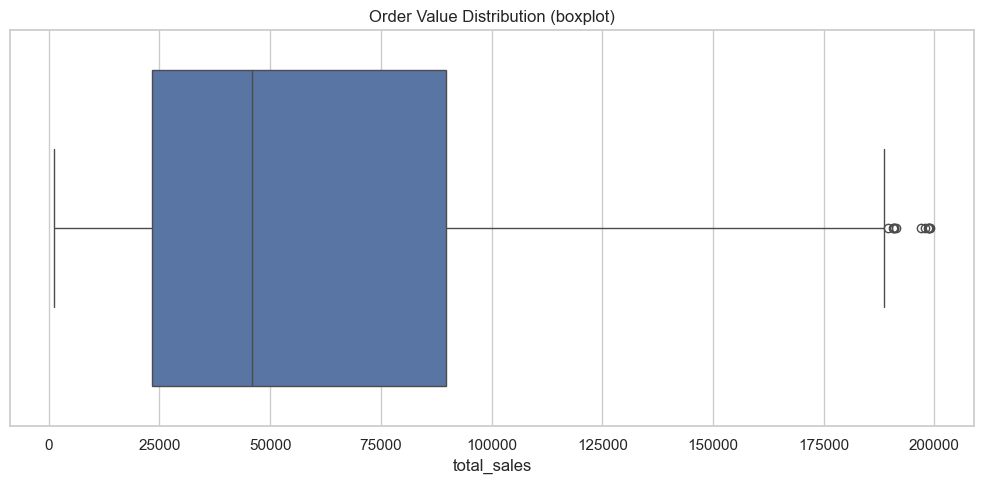

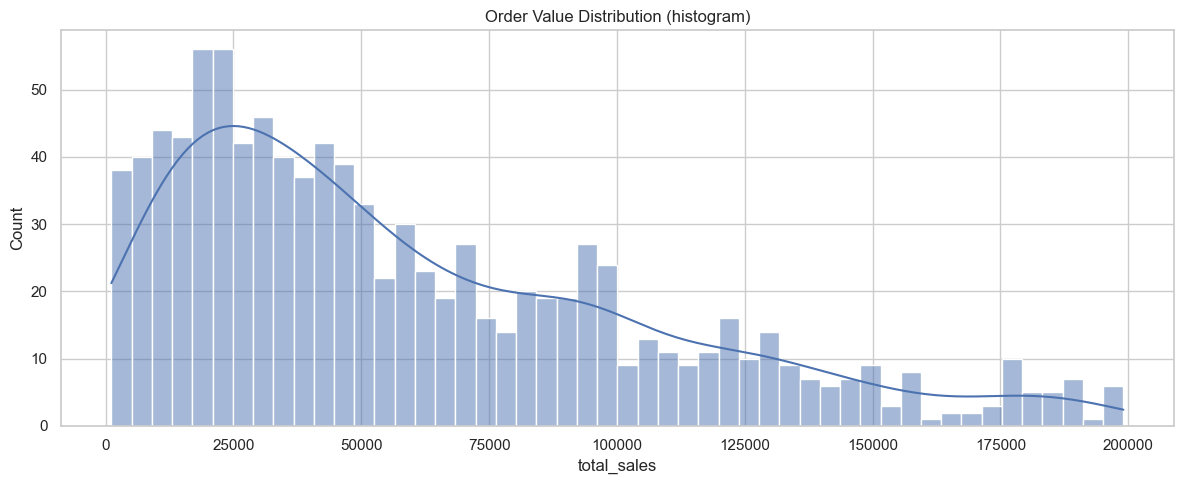

In [18]:
# Cell 13 — distribution of order values
plt.figure(figsize=(10,5))
sns.boxplot(x=df['total_sales'])
plt.title("Order Value Distribution (boxplot)")
plt.tight_layout()
plt.savefig("order_value_boxplot.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['total_sales'], kde=True, bins=50)
plt.title("Order Value Distribution (histogram)")
plt.tight_layout()
plt.savefig("order_value_hist.png", bbox_inches='tight')
plt.show()


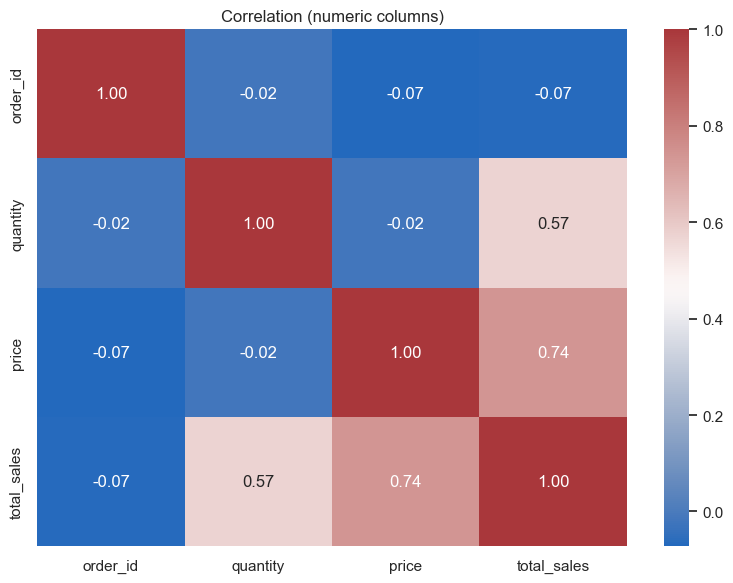

In [19]:
# Cell 14 — correlation
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag')
plt.title("Correlation (numeric columns)")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", bbox_inches='tight')
plt.show()


In [20]:
# Cell 15 — final bi-weekly summary table
biweekly_summary = df_ts.resample('2W').agg(total_revenue=('total_sales','sum'), orders=('order_id','count'), avg_order_value=('total_sales','mean')).reset_index()
biweekly_summary['biweek_label'] = biweekly_summary['order_date'].dt.strftime('%Y-%m-%d') + " to " + (biweekly_summary['order_date'] + pd.Timedelta(days=13)).dt.strftime('%Y-%m-%d')
biweekly_summary = biweekly_summary[['biweek_label','total_revenue','orders','avg_order_value']]
biweekly_summary.head()

# save to csv for client reporting
biweekly_summary.to_csv("biweekly_summary.csv", index=False)


In [21]:
top_products.to_csv("top_products.csv", index=False)
top_categories.to_csv("top_categories.csv", index=False)
top_cities.to_csv("top_cities.csv", index=False)
# charts already saved earlier via plt.savefig(...)


In [22]:
# Cell 17 — quick automated insights template (manual polishing recommended)
insights = []
# Example: top product share
p = top_products.iloc[0]
insights.append(f"Top product: {p['product']} contributed ₹{p['revenue']:.0f} in revenue.")

# Monthly growth check
if len(monthly_rev) > 1:
    growth = (monthly_rev['revenue'].iloc[-1] - monthly_rev['revenue'].iloc[-2]) / (monthly_rev['revenue'].iloc[-2] + 1e-6)
    insights.append(f"Monthly revenue growth (last month vs prev): {growth:.1%}")

insights


['Top product: Laptop contributed ₹13626001 in revenue.',
 'Monthly revenue growth (last month vs prev): -28.6%']